## Effect of quarantine

## Background

From the result of the [risk of COVID-19 outbreak in an enclosed environment](/covid19-outbreak-simulator/applications/Enclosed/),
it was clear that it is risky to introduce someone to a population directly because he or she might be asymptomatic or pre-symptomatic
when being introduced to the population.

It then makes sense to quarantine personnel who will be dispatched to the population, and question is how long the quarantine
period should be.

## Assumptions

1. The enclosed environment has 64 staff, with one carrier of the SARS-CoV-2 virus.
2. The carrier was quarantined for a fixed period of time before introduction to the population. He or she will not be dispatched if s/he shows symptom during quarantine.

We are interested in knowning:

1. Is 7 day quarantine good enough.
2. Is 14 day quarantine good enough to prevent a potential outbreak.

## Simulation of outbreaks

This scenario can be simulated with the following command:

```
outbreak_simulator --popsize 64  --infectors 0 --leadtime asymptomatic --repeats 10000 --handle-symptomatic remove \
  --plugin quarantine 0 --start 0 --duration 7 
```
where

* `--popsize` is the population size
* `--infector` is the individual with the virus, 0 is its ID.
* `--leadtime asymptomatic` means the individual could be in any stage of infection, as long as he or she does not show any symptom.
* `--handle-symptomatic remove` removes individuals as soon as he or she shows symptom.
* `--plugin quarantine` calls plugin quarantine

We use default options for other key parameters, which includes

* `--sympatomatic-r0`: production number (average number of individuals an infected individual will infect) from `1.4` to `2.8`
* `--asymptomatic-r0`: production number of asymptomatic cases from `0.28 to `0.56`.
* `--prop-asym-carriers`: proportion of asymptomatic carriers in a simulation, range from `0.2` to `0.4`


In [1]:
outbreak_simulator --popsize 64  --infectors 0 --leadtime asymptomatic --repeats 10000 \
    --handle-symptomatic remove --logfile quarantine_7.log \
    --plugin quarantine 0 --start 0 --duration 7 > quarantine_7.txt

100%|███████████████████████████████████| 10000/10000 [00:06<00:00, 1462.68it/s]



In [2]:
outbreak_simulator --popsize 64  --infectors 0 --leadtime asymptomatic --repeats 10000 \
    --handle-symptomatic remove --logfile quarantine_14.log \
    --plugin quarantine 0 --start 0 --duration 14 > quarantine_14.txt

100%|███████████████████████████████████| 10000/10000 [00:07<00:00, 1365.31it/s]



## Results

### Distribution of duration of outbreak vs remaining population size

Just to show the overall results of simulations, the following figures display the duration of outbreak (x-axis) vs the remaining population size (y-axis) for a few scenarios. 

In [3]:
library(ggplot2)
library(ggExtra)

plot_time_vs_size <- function(data_file, title) {
    data = read.table(data_file, sep='\t', header=1)
    end_count = data[data['event'] == 'END',]
    end_count$target = as.numeric(as.character(end_count$target))
   
    title = paste0('\nDuration vs Remaining Popsize (', title, ')')
  
    p <- ggplot(end_count, aes(x=time, y=target)) + geom_point(size=0.2, color='slateblue') + theme(legend.position="none") +
      xlab('Days') + ylab('Remaining Population Size') + ggtitle(title)
    
    p1 <- ggMarginal(p, type="histogram", 
                    xparams=list(bins=120),
                    yparams=list(bins=24),
                    fill = "slateblue",
                    color="slateblue"
                    ) 
    print(p1)    
}


For example, the the first version of the simulation script, there is a clear lognormal shaped distribution for duration of outbreaks, which indicates the first outbreak will happen around 5 days after the introduction of the seed carrier, and there are likely second and third outbreaks.

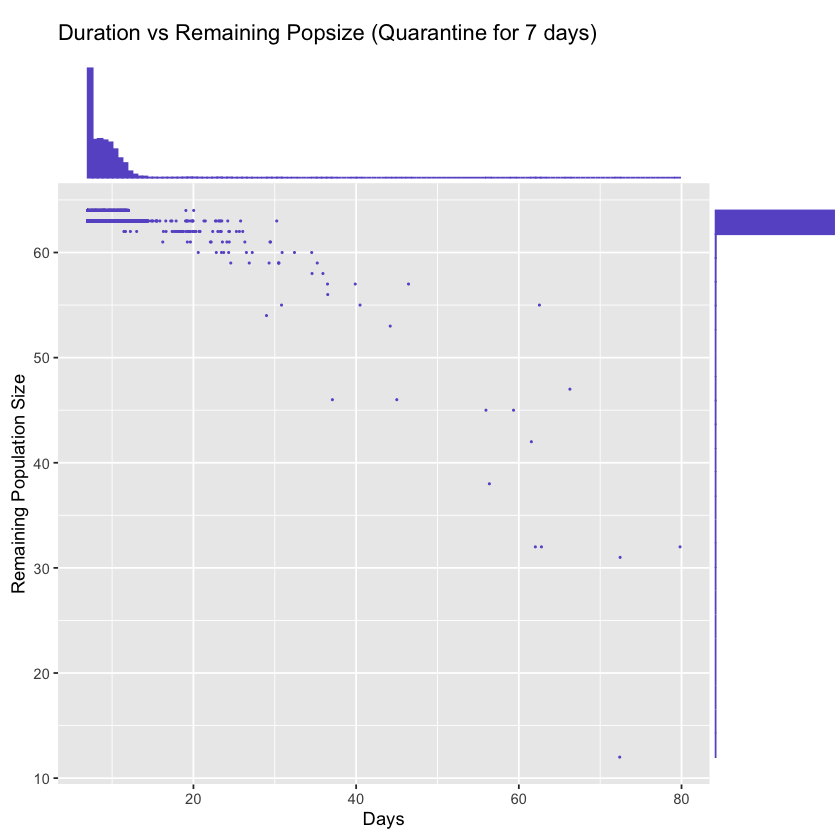

In [4]:
plot_time_vs_size('quarantine_7.log', 'Quarantine for 7 days')

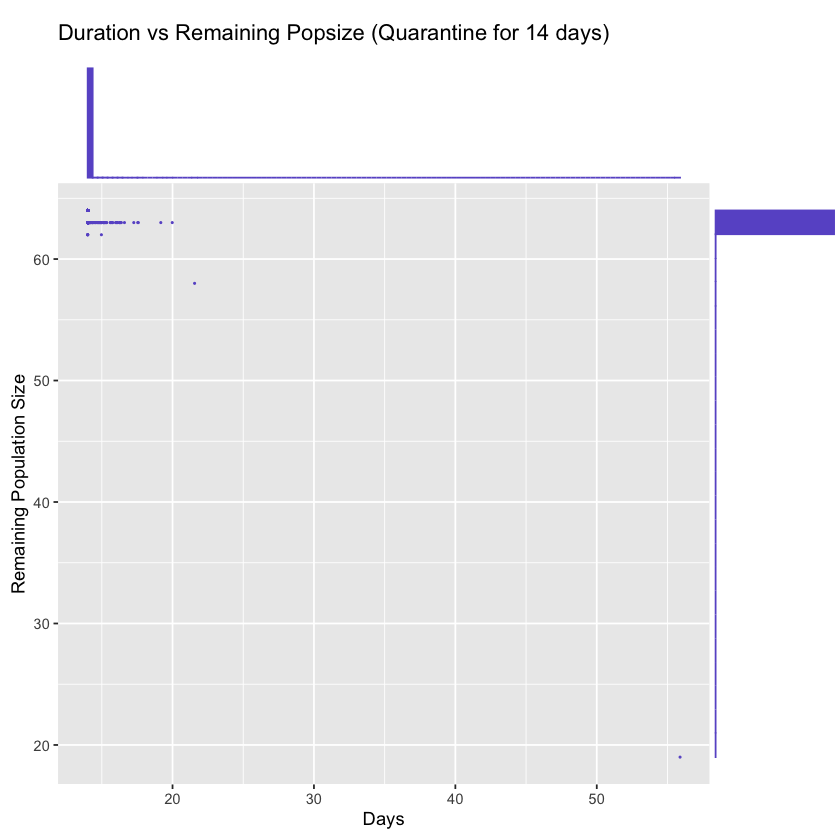

In [5]:
plot_time_vs_size('quarantine_14.log', 'Quarantine for 14 days')

As you can see, there are quite some outbreaks happened after 7-day quarantine. The 14-days quarantine avoided a majority of the outbreaks, but there are still some left. Let us check the details.

The summary statistics of 7-day quarantine is in `quarantine_7.txt`.

In [6]:
import pandas as pd
stat = pd.read_csv('quarantine_7.txt', sep='\t', index_col=0)

In [7]:
%expand 
### 7-day quarantine

Out of 10000 simulations, {10000-int(stat.loc['total_reintegration'][0])} people showed symptoms during
quarantine and were not introduced to the population.  {stat.loc['total_reintegration'][0]} were introduced
to the population. However, a majority of them were asymptomatic cases and were less infectious than
symptomatic cases. Even for pre-symptomatic cases who were highly infectious, their duration of infectivity
have been significantly shortened due to the quarantine. In the end, **an outbreak, defined for simulations
with ending population size less than or equal to 62, happened in 
{100-int(stat.loc['n_remaining_popsize_64'][0])/100 - int(stat.loc['n_remaining_popsize_63'][0])/100:.2f}% of the simulations**.

### 7-day quarantine

Out of 10000 simulations, 7104 people showed symptoms during
quarantine and were not introduced to the population.  2896 were introduced
to the population. However, a majority of them were asymptomatic cases and were less infectious than
symptomatic cases. Even for pre-symptomatic cases who were highly infectious, their duration of infectivity
have been significantly shortened due to the quarantine. In the end, **an outbreak, defined for simulations
with ending population size less than or equal to 62, happened in 
0.89% of the simulations**.


In [8]:
import pandas as pd
stat = pd.read_csv('quarantine_14.txt', sep='\t', index_col=0)

In [9]:
%expand 

### 14-day quarantine

After 14-day quarantine, {stat.loc['total_reintegration'][0]} individuals were introduced
to the population, a majority of them should be asymptomatic cases. In the end, **outbreaks happened in 
{100-int(stat.loc['n_remaining_popsize_64'][0])/100 - int(stat.loc['n_remaining_popsize_63'][0])/100:.2f}% of the simulations**.

If we examine the cases in detail, one of the symptomatic cases had an extra-long incubation period (16 day) so
he showed symptom 2 days after he was introduced to the population and have already infected another person.

### 14-day quarantine

After 14-day quarantine, 2518 individuals were introduced
to the population, a majority of them should be asymptomatic cases. In the end, **outbreaks happened in 
0.07% of the simulations**.

If we examine the cases in detail, one of the symptomatic cases had an extra-long incubation period (16 day) so
he showed symptom 2 days after he was introduced to the population and have already infected another person.


## Availability

This notebook is available under the `Applications` directory of the [GitHub repository](https://github.com/ictr/covid19-outbreak-simulator) of the COVID19 Outbreak Simulator. It can be executed with [`sos-papermill`](https://github.com/vatlab/sos-papermill) with the following parameters, or using a docker image `bcmictr/outbreak-simulator-notebook` as described in [here](/covid19-outbreak-simulator/docs/cli/).